## Better way of importing for readablity

In [3]:
## Chapter 3 imports

In [68]:
import matplotlib.pyplot as plt
import pandas as pd 
import janitor as jn
import numpy as np
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder
)
from sklearn.naive_bayes import (
    MultinomialNB
)
from sklearn.datasets import (
    load_iris
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC,
)
from yellowbrick.model_selection import (
    LearningCurve,
)
from yellowbrick.datasets import (
    load_game
)
import missingno as msno


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## PANDAS

### 1. value_counts doesn't show values of Nan, so pass the argument dropna=False to get a count of Nan for a column with  

df['column']value_counts(dropna=False)

In [8]:
grade_data = {
    'grade': [3.0, 3.0, 4.0, 4.0, None]
}
df = pd.DataFrame.from_dict(grade_data)

# Nan not counted for 
df['grade'].value_counts()

#Nan being counted
df['grade'].value_counts(dropna=False)

3.0    2
4.0    2
Name: grade, dtype: int64

3.0    2
4.0    2
NaN    1
Name: grade, dtype: int64

### 2. get_dummies pandas method has drop_first=True  to remove perfectly inverse correlated dummy variables, also prefix='', prefix_sep='' argument

In [12]:
gender = {
    'gender': ['M', 'F', 'M', 'F']
}

df2 = pd.DataFrame.from_dict(gender)

pd.get_dummies(df2, prefix='', prefix_sep='')

pd.get_dummies(df2, drop_first=True, prefix='', prefix_sep='')

,F,M
0,0,1
1,1,0
2,0,1
3,1,0


,M
0,1
1,0
2,1
3,0


## 3. Method chaining in pandas

In [17]:
# Copied from https://github.com/pyjanitor-devs/pyjanitor
# Sample Data curated for this example
company_sales = {
    'SalesMonth': ['Jan', 'Feb', 'Mar', 'April'],
    'Company1': [150.0, 200.0, 300.0, 400.0],
    'Company2': [180.0, 250.0, np.nan, 500.0],
    'Company3': [400.0, 500.0, 600.0, 675.0]
}


# The Pandas Way

# 1. Create a pandas DataFrame from the company_sales dictionary
df = pd.DataFrame.from_dict(company_sales)

# 2. Delete a column from the DataFrame. Say 'Company1'
del df['Company1']

# 3. Drop rows that have empty values in columns 'Company2' and 'Company3'
df = df.dropna(subset=['Company2', 'Company3'])

# 4. Rename 'Company2' to 'Amazon' and 'Company3' to 'Facebook'
df = df.rename(
    {
        'Company2': 'Amazon',
        'Company3': 'Facebook',
    },
    axis=1,
)

# 5. Let's add some data for another company. Say 'Google'
df['Google'] = [450.0, 550.0, 800.0]

# Output looks like this:
# Out[15]:
# SalesMonth  Amazon  Facebook  Google
# 0        Jan   180.0     400.0   450.0
# 1        Feb   250.0     500.0   550.0
# 3      April   500.0     675.0   800.0

In [18]:
# Method Chaining

df = (
     pd.DataFrame(company_sales)
    .drop(columns="Company1")
    .dropna(subset=['Company2', 'Company3'])
    .rename(columns={"Company2": "Amazon", "Company3": "Facebook"})
    .assign(Google=[450.0, 550.0, 800.0])
)

In [19]:
df

,SalesMonth,Amazon,Facebook,Google
0,Jan,180.0,400.0,450.0
1,Feb,250.0,500.0,550.0
3,April,500.0,675.0,800.0


## 4.pandas selecting columns based on there type

In [75]:
titanic_data = pd.read_csv('./data/titanic_data.csv')
titanic_data.select_dtypes(include='number').head(2)
titanic_data.select_dtypes(exclude='number').head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


## 5. Pandas get missing data in any column or row

In [79]:
grade_data = {
    'grade': [3.0, 3.0, 4.0, 4.0, None]
}
df = pd.DataFrame.from_dict(grade_data)

grade_data2 = {
    'grade': [3.0, 3.0, 4.0, 4.0, 5.0]
}
df2 = pd.DataFrame.from_dict(grade_data2)

df.isna().any().any()
df2.isna().any().any()

True

False

## [pyjantor](!https://pyjanitor.readthedocs.io/en/latest/)

## pyjantor is a library that extends some functionality in pandas with verb based methods which the code to read easier

In [20]:
company_sales = {
    'SalesMonth': ['Jan', 'Feb', 'Mar', 'April'],
    'Company1': [150.0, 200.0, 300.0, 400.0],
    'Company2': [180.0, 250.0, np.nan, 500.0],
    'Company3': [400.0, 500.0, 600.0, 675.0]
}


# The Pandas Way

# 1. Create a pandas DataFrame from the company_sales dictionary
df = pd.DataFrame.from_dict(company_sales)




## 1. Method chaining with pyjantor

In [22]:
# pyjantor methods
df = (
     pd.DataFrame.from_dict(company_sales)
    .remove_columns(['Company1'])
    .dropna(subset=['Company2', 'Company3'])
    .rename_column('Company2', 'Amazon')
    .rename_column('Company3', 'Facebook')
    .add_column('Google', [450.0, 550.0, 800.0])
)

df

,SalesMonth,Amazon,Facebook,Google
0,Jan,180.0,400.0,450.0
1,Feb,250.0,500.0,550.0
3,April,500.0,675.0,800.0


## 2. Split pandas dataframe into X, y labels

In [30]:
train_dict = {
    'feature1': [i for i in range(0,5)],
    'feature2': [i for i in range(0,10,2)],
    'label':    [1,1,1,0,0],
}

train_df = pd.DataFrame.from_dict(train_dict)

X, y = jn.ml.get_features_targets(
     train_df, target_columns='label')

X
y

,feature1,feature2
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


0    1
1    1
2    1
3    0
4    0
Name: label, dtype: int64

## 3. The pyjanitor clean_names function will return a DataFrame with columns in lowercase and spaces replaced by underscores

In [77]:
df5 = pd.DataFrame({
    'A':[1,2,3],
    ' column with spaces':[1,3,5]
})

df5 = jn.clean_names(df5)
df5

,a,_column_with_spaces
0,1,1
1,2,3
2,3,5


## Yellowbrick 

[Offical_Docs](!https://www.scikit-yb.org/en/latest/quickstart.html)

### Learning Curve:

A learning curve is used to tell us if we have enough training data. It trains the model with increasing portions of the data and measures the score. If the cross-validation score continues to climb, then we might need to invest in gath‐ ering more data. 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

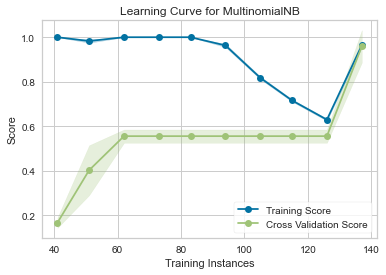

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [65]:
# Load a classification dataset
#X, y = load_iris()
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['species'] = data['target']
df.head()

fig, ax = plt.subplots(figsize=(6, 4))
# Encode the categorical data
X, y = jn.ml.get_features_targets(
     df, target_columns='species')

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4, ax=ax
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.poof()           # Finalize and render the figure

In [66]:
fig.savefig("Learning_Curve.png")

## MissingNo for Missing Data

https://github.com/ResidentMario/missingno

In [69]:
titanic_data = pd.read_csv('./data/titanic_data.csv')

<AxesSubplot:>

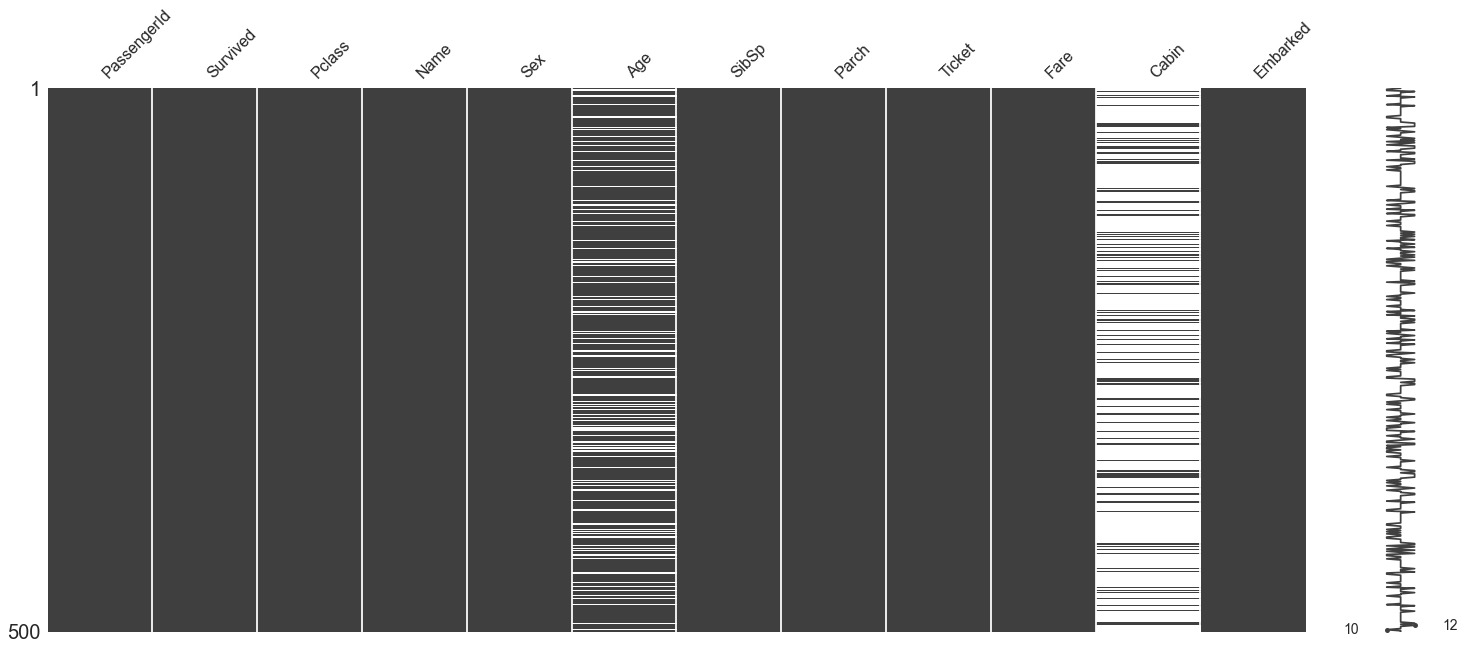

In [70]:
msno.matrix(titanic_data.sample(500))

<AxesSubplot:>

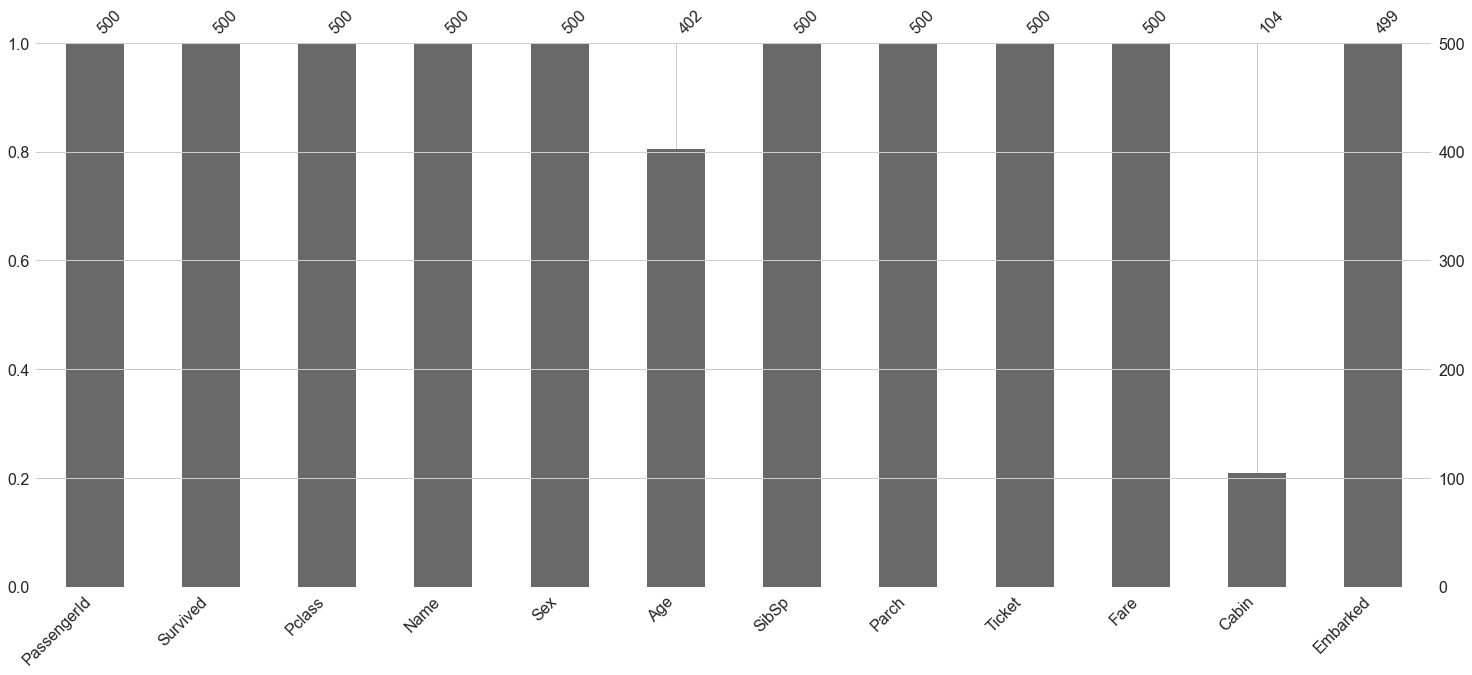

In [71]:
msno.bar(titanic_data.sample(500))

<AxesSubplot:>

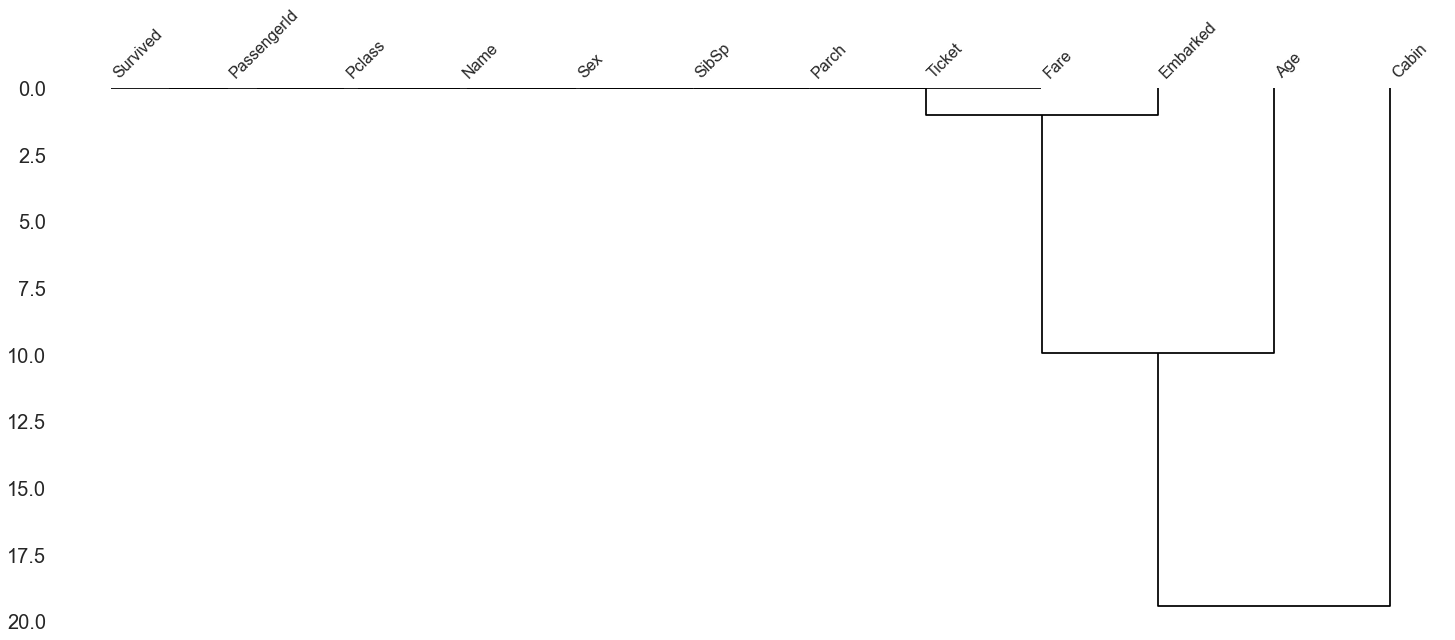

In [72]:
msno.dendrogram(titanic_data.sample(500))